Epoch 1/20


C:\Users\SED\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4062 - mae: 0.7979 - val_loss: 0.4626 - val_mae: 0.4850
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4213 - mae: 0.4623 - val_loss: 0.4204 - val_mae: 0.4589
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3637 - mae: 0.4313 - val_loss: 0.3911 - val_mae: 0.4392
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3503 - mae: 0.4205 - val_loss: 0.4275 - val_mae: 0.4768
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4173 - mae: 0.4299 - val_loss: 0.3606 - val_mae: 0.4166
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3418 - mae: 0.4101 - val_loss: 0.3522 - val_mae: 0.4217
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3539 - mae: 0.4051 - val_loss: 0.3524 - val_mae: 0.4219
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3171 - mae: 0.3942 - val_loss: 0.3340 - val_mae: 0.4023
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3094 

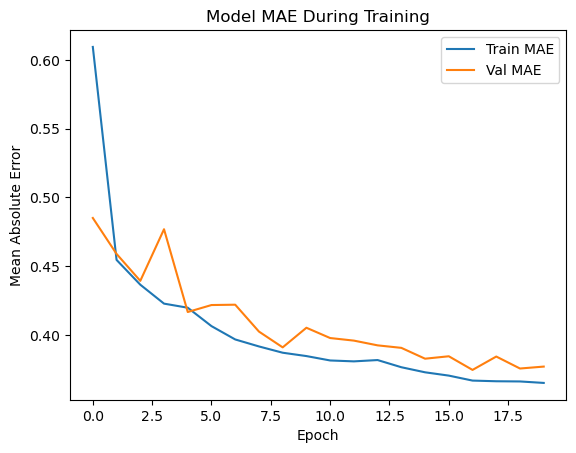

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # No activation (linear output for regression)
])

# 5. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 7. Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

# 8. Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
